# Non-Clifford Interleaved Randomized Benchmarking of a CS gate

In [141]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 5
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'Non-Clifford'

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

rb_nonclifford_Z_circs, xdata, rb_nonclifford_X_circs, rb_nonclifford_interleaved_Z_circs, \
rb_nonclifford_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_nonclifford_Z_circs[0][0])

         ┌────────────┐┌───┐      ░  ░          ┌───┐     ┌──────────┐┌─┐
qr_0: |0>┤ U1(5.4978) ├┤ X ├──■───░──░───■──────┤ X ├─────┤ U1(pi/4) ├┤M├
         └┬──────────┬┘└───┘┌─┴─┐ ░  ░ ┌─┴─┐┌───┴───┴────┐└───┬─┬────┘└╥┘
qr_1: |0>─┤ U1(pi/2) ├──────┤ X ├─░──░─┤ X ├┤ U1(4.7124) ├────┤M├──────╫─
          └──────────┘      └───┘ ░  ░ └───┘└────────────┘    └╥┘      ║ 
 cr_0: 0 ══════════════════════════════════════════════════════╬═══════╩═
                                                               ║         
 cr_1: 0 ══════════════════════════════════════════════════════╩═════════
                                                                         


In [5]:
print (rb_nonclifford_interleaved_Z_circs[0][0])

         ┌────────────┐┌───┐      ░ ┌──────────┐ ░  ░                    »
qr_0: |0>┤ U1(5.4978) ├┤ X ├──■───░─┤0         ├─░──░─────────────────■──»
         └┬──────────┬┘└───┘┌─┴─┐ ░ │  unitary │ ░  ░ ┌────────────┐┌─┴─┐»
qr_1: |0>─┤ U1(pi/2) ├──────┤ X ├─░─┤1         ├─░──░─┤ U1(5.4978) ├┤ X ├»
          └──────────┘      └───┘ ░ └──────────┘ ░  ░ └────────────┘└───┘»
 cr_0: 0 ════════════════════════════════════════════════════════════════»
                                                                         »
 cr_1: 0 ════════════════════════════════════════════════════════════════»
                                                                         »
«          ┌───┐     ┌──────────┐┌─┐
«qr_0: ────┤ X ├─────┤ U1(pi/2) ├┤M├
«      ┌───┴───┴────┐└───┬─┬────┘└╥┘
«qr_1: ┤ U1(5.4978) ├────┤M├──────╫─
«      └────────────┘    └╥┘      ║ 
«cr_0: ═══════════════════╬═══════╩═
«                         ║         
«cr_1: ═══════════════════╩═════════
«                            

In [6]:
print (rb_nonclifford_X_circs[0][0])

         ┌───┐ ░ ┌────────────┐┌───┐      ░  ░          ┌───┐     ┌──────────┐»
qr_0: |0>┤ H ├─░─┤ U1(5.4978) ├┤ X ├──■───░──░───■──────┤ X ├─────┤ U1(pi/4) ├»
         ├───┤ ░ └┬──────────┬┘└───┘┌─┴─┐ ░  ░ ┌─┴─┐┌───┴───┴────┐└────░─────┘»
qr_1: |0>┤ H ├─░──┤ U1(pi/2) ├──────┤ X ├─░──░─┤ X ├┤ U1(4.7124) ├─────░──────»
         └───┘ ░  └──────────┘      └───┘ ░  ░ └───┘└────────────┘     ░      »
 cr_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
 cr_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░  ┌───┐┌─┐
«qr_0: ──░──┤ H ├┤M├
«      ┌───┐└┬─┬┘└╥┘
«qr_1: ┤ H ├─┤M├──╫─
«      └───┘ └╥┘  ║ 
«cr_0: ═══════╬═══╩═
«             ║     
«cr_1: ═══════╩═════
«                   


In [7]:
print (rb_nonclifford_interleaved_X_circs[0][0])

         ┌───┐ ░ ┌────────────┐┌───┐      ░ ┌──────────┐ ░  ░               »
qr_0: |0>┤ H ├─░─┤ U1(5.4978) ├┤ X ├──■───░─┤0         ├─░──░───────────────»
         ├───┤ ░ └┬──────────┬┘└───┘┌─┴─┐ ░ │  unitary │ ░  ░ ┌────────────┐»
qr_1: |0>┤ H ├─░──┤ U1(pi/2) ├──────┤ X ├─░─┤1         ├─░──░─┤ U1(5.4978) ├»
         └───┘ ░  └──────────┘      └───┘ ░ └──────────┘ ░  ░ └────────────┘»
 cr_0: 0 ═══════════════════════════════════════════════════════════════════»
                                                                            »
 cr_1: 0 ═══════════════════════════════════════════════════════════════════»
                                                                            »
«               ┌───┐     ┌──────────┐  ░  ┌───┐┌─┐
«qr_0: ──■──────┤ X ├─────┤ U1(pi/2) ├──░──┤ H ├┤M├
«      ┌─┴─┐┌───┴───┴────┐└────░─────┘┌───┐└┬─┬┘└╥┘
«qr_1: ┤ X ├┤ U1(5.4978) ├─────░──────┤ H ├─┤M├──╫─
«      └───┘└────────────┘     ░      └───┘ └╥┘  ║ 
«cr_0: ═══════════════════════════════

### Add a depolarizing noise to the CS gate

In [129]:
### Add depolarizing error to "cs" gate

p1Q = 0.002
p2Q = 0.04

# Construct the error
cs_error = errors.depolarizing_error(p2Q/2, 2)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print(basis_gates)

NoiseModel:
  Basis gates: ['cx', 'id', 'u3']
  Instructions with noise: ['cs', 'u3', 'cx']
  All-qubits errors: ['u3', 'cx', 'cs']
['cx', 'id', 'u3', 'unitary']


### Execute the RB sequences

In [130]:
#Non-Clifford RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
nonclifford_X_result_list = []
nonclifford_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_nonclifford_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    nonclifford_X_result_list.append(job.result())
    nonclifford_X_qobj_list.append(qobj)    
print("Finished Simulating Non-Clifford X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating Non-Clifford X Circuits


In [131]:
#Non-Clifford interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
nonclifford_interleaved_X_result_list = []
nonclifford_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_nonclifford_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    nonclifford_interleaved_X_result_list.append(job.result())
    nonclifford_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating Non-Clifford X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating Non-Clifford X Circuits


In [132]:
#Non-Clifford RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
nonclifford_Z_result_list = []
nonclifford_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_nonclifford_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    nonclifford_Z_result_list.append(job.result())
    nonclifford_Z_qobj_list.append(qobj)    
print("Finished Simulating Non-Clifford Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating Non-Clifford Z Circuits


In [133]:
#Non-Clifford inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
nonclifford_interleaved_Z_result_list = []
nonclifford_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_nonclifford_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    nonclifford_interleaved_Z_result_list.append(job.result())
    nonclifford_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating Non-Clifford Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating Non-Clifford Z Circuits


### Fit the results

In [134]:
#Create the non-Clifford Z and X RB fitters
nonclifford_Z_rb_fit = rb.RBFitter(nonclifford_Z_result_list, xdata, rb_opts['rb_pattern'])
nonclifford_X_rb_fit = rb.RBFitter(nonclifford_X_result_list, xdata, rb_opts['rb_pattern'])

In [135]:
#Create the non-Clifford intelreaved Z and X RB fitters
nonclifford_interleaved_Z_rb_fit = rb.RBFitter(nonclifford_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
nonclifford_interleaved_X_rb_fit = rb.RBFitter(nonclifford_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [136]:
#Calculate the joint fitter
joint_rb_fit = rb.NonCliffordRBFitter(nonclifford_Z_result_list, nonclifford_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.NonCliffordRBFitter(nonclifford_interleaved_Z_result_list, nonclifford_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [137]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit non-Clifford RB:', joint_rb_fit.fit_nonclifford[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit non-Clifford interleaved RB:', joint_int_rb_fit.fit_nonclifford[patt_ind])

pattern: 0 - 2 qubit non-Clifford RB: {'alpha': 0.933582611151589, 'alpha_err': 0.004372160310559741, 'epg_est': 0.04981304163630823, 'epg_est_err': 0.003512405001711588}
pattern: 0 - 2 qubit non-Clifford interleaved RB: {'alpha': 0.9058778593218058, 'alpha_err': 0.009263157844047578, 'epg_est': 0.07059160550864568, 'epg_est_err': 0.007669210933399894}


In [138]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_nonclifford[0]['alpha']
alpha_c = joint_int_rb_fit.fit_nonclifford[0]['alpha']
alpha_err = joint_rb_fit.fit_nonclifford[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_nonclifford[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))

Estimated gate error: 0.022257 (0.004894)


### Plot the results

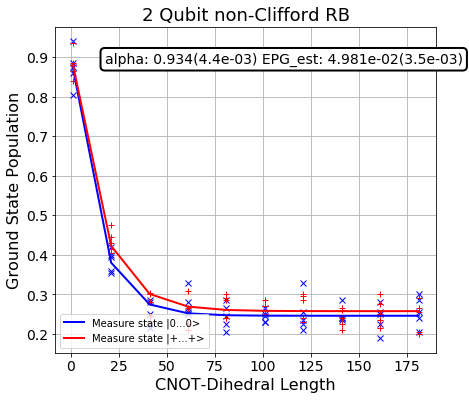

In [139]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

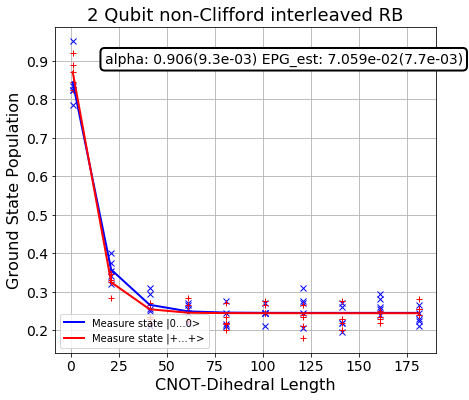

In [140]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()